# Lab 1 Quantum Circuits

Prerequisite
- [Qiskit basics](https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html)
- [Ch.1.2 The Atoms of Computation](https://qiskit.org/textbook/ch-states/atoms-computation.html)

Other relevant materials
- [Access IBM Quantum Systems](https://qiskit.org/documentation/install.html#access-ibm-quantum-systems)
- [IBM Quantum Systems Configuration](https://quantum-computing.ibm.com/docs/manage/backends/configuration)
- [Transpile](https://qiskit.org/documentation/apidoc/transpiler.html)
- [IBM Quantum account](https://quantum-computing.ibm.com/docs/manage/account/ibmq)
- [Quantum Circuits](https://qiskit.org/documentation/apidoc/circuit.html)  

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

<h2 style="font-size:24px;">Part 1: Classical logic gates with quantum circuits</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Create quantum circuit functions that can compute the XOR, AND, NAND and OR gates using the NOT gate (expressed as x in Qiskit), the CNOT gate (expressed as cx in Qiskit) and the Toffoli gate (expressed as ccx in Qiskit) .</p>
</div>

An implementation of the `NOT` gate is provided as an example.

In [2]:
def NOT(inp):
    """An NOT gate.
    
    Parameters:
        inp (str): Input, encoded in qubit 0.
        
    Returns:
        QuantumCircuit: Output NOT circuit.
        str: Output value measured from qubit 0.
    """

    qc = QuantumCircuit(1, 1) # A quantum circuit with a single qubit and a single classical bit
    qc.reset(0)
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if inp=='1':
        qc.x(0)
        
    # barrier between input state and gate operation 
    qc.barrier()
    
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x(0)
    
    #barrier between gate operation and measurement
    qc.barrier()
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure(0,0)
    qc.draw('mpl')
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return qc, output

NOT with input 0 gives output 1


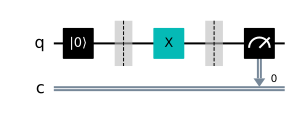



NOT with input 1 gives output 0


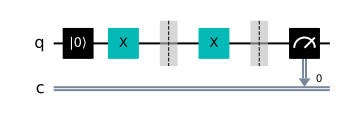

In [3]:
## Test the function
for inp in ['0', '1']:
    qc, out = NOT(inp)
    print('NOT with input',inp,'gives output',out)
    display(qc.draw())
    print('\n')

<h3 style="font-size: 20px">&#128211; XOR gate</h3>

Takes two binary strings as input and gives one as output.

The output is '0' when the inputs are equal and  '1' otherwise.

In [2]:
def XOR(inp1,inp2):
    """An XOR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 1.
    """
  
    qc = QuantumCircuit(2, 1) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    # this is where your program for quantum XOR gate goes
    
    
    
    
    
    
    
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    qc.measure(1,0) # output from qubit 1 is measured
  
    #We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    #Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [1]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = XOR(inp1, inp2)
        print('XOR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

<h3 style="font-size: 20px">&#128211; AND gate</h3>

Takes two binary strings as input and gives one as output.

The output is `'1'` only when both the inputs are `'1'`.

In [6]:
def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    # this is where your program for quantum AND gate goes

    
    
    
    
    

    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [2]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('AND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

<h3 style="font-size: 20px">&#128211; NAND gate</h3>

Takes two binary strings as input and gives one as output.

The output is `'0'` only when both the inputs are `'1'`.

In [8]:
def NAND(inp1,inp2):
    """An NAND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output NAND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
    
    # this is where your program for quantum NAND gate goes


    
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [3]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = NAND(inp1, inp2)
        print('NAND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

<h3 style="font-size: 20px">&#128211; OR gate</h3>

Takes two binary strings as input and gives one as output.

The output is '1' if either input is '1'.

In [10]:
def OR(inp1,inp2):
    """An OR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """

    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
   
    # this is where your program for quantum OR gate goes


    
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [4]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = OR(inp1, inp2)
        print('OR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

<h2 style="font-size:24px;">Part 2: AND gate on Quantum Computer</h2>
<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Execute AND gate on two quantum systems and learn how the different circuit properties affect the result.</p>
</div>

In Part 1 you made an `AND` gate from quantum gates, and executed it on the simulator.  Here in Part 2 you will do it again, but instead run the circuits on a real quantum computer.  When using a real quantum system, one thing you should keep in mind is that present day quantum computers are not fault tolerant; they are noisy.

The 'noise' in a quantum system is the collective effects of all the things that should not happen, but nevertheless do. Noise results in outputs are not always what we would expect. There is noise associated with all processes in a quantum circuit: preparing the initial state, applying gates, and qubit measurement.  For the gates, noise levels can vary between different gates and between different qubits. `cx` gates are typically more noisy than any single qubit gate.

Here we will use the quantum systems from the IBM Quantum Experience.  If you do not have acess, you can do so [here](https://qiskit.org/documentation/install.html#access-ibm-quantum-systems).

Now that you are ready to use the real quantum computer, let's begin.

<h3 style="font-size: 20px">Step 1. Choosing a device</h3>

First load the account from the credentials saved on disk by running the following cell:

In [17]:
IBMQ.load_account()

After your account is loaded, you can see the list of providers that you have access to by running the cell below. Each provider offers different systems for use. For open users, there is typically only one provider `ibm-q/open/main`:.

In [16]:
IBMQ.providers()

Let us grab the provider using `get_provider`.  The command, <code>provider.backends( )</code> shows you the list of backends that are available to you from the selected provider.

In [15]:
provider = IBMQ.get_provider('ibm-q')
provider.backends()

Among these options, you may pick one of the systems to run your circuits on.  All except the `ibmq_qasm_simulator` all are real quantum computers that you can use.  The differences among these systems resides in the number of qubits, their connectivity, and the system error rates.  

Upon executing the following cell you will be presented with a widget that displays all of the information about your choice of the backend.  You can obtain information that you need by clicking on the tabs. For example, backend status, number of qubits and the connectivity are under `configuration` tab, where as the `Error Map` tab will reveal the latest noise information for the system. 

In [9]:
import qiskit.tools.jupyter

backend_ex = provider.get_backend('ibmq_16_melbourne')
backend_ex

For our AND gate circuit, we need a backend with three or more qubits, which is true for all the real systems except for `ibmq_armonk`.  Below is an example of how to filter backends, where we filter for number of qubits, and remove simulators:

In [8]:
backends = provider.backends(filters = lambda x:x.configuration().n_qubits >= 2 and not x.configuration().simulator
                             and x.status().operational==True)
backends

One convienent way to choose a system is using the `least_busy` function to get the backend with the lowest number of jobs in queue.  The downside is that the result might have relatively poor accuracy because, not surprisingly, the lowest error rate systems are the most popular.

In [17]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
backend

Real quantum computers need to be recalibrated regularly, and the fidelity of a specific qubit or gate can change over time. Therefore, which system would produce results with less error can vary. `ibmq_athens` tends to show relatively low error rates.

In this exercise, we select two systems: `ibmq_athens` for its low error rates, and `ibmqx2` for its additional connectivity, in particular its triangular connectivity, that will be useful for circuits with Toffoli gates.

In [5]:
# run this cell
backend1 = provider.get_backend('ibmqx2')
backend2 = provider.get_backend('ibmq_athens')

<h3 style="font-size: 20px">Step 2. Define AND function for a real device</h3>

We now define the AND function.  We choose 8192 as the the number of shots, the maximum number of shots for open IBM systems, to reduce the variance in the final result. Related informations is well explained [here](https://quantum-computing.ibm.com/docs/manage/backends/configuration)

<h4 style="font-size: 16px">Qiskit Transpiler</h4>

It is important to know that when running a circuit on a real quantum computer, cicruits typically need to be transpiled for the backend that you select so that the circuit contains only those gates that the quantum computer can actually perform. Primarily this involves the addition of swap gates so that two-qubit gates in the circuit map to those pairs of qubits on the device that can actually perform these gates. The following cell shows the AND gate represented as a Toffoli gate decomposed into single- and two-qubit gates, which are the only types of gate that can be run on IBM hardware.  Provided that CNOT gates can be performed between all three qubits, a triangle topology, no other gates are required.

AND gate


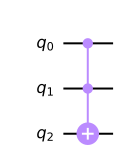



Transpiled AND gate with all the reqiured connectiviy


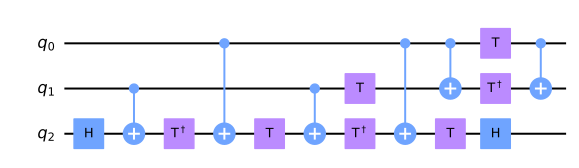

In [4]:
qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)
print('AND gate')
display(qc_and.draw())
print('\n\nTranspiled AND gate with all the reqiured connectiviy')
qc_and.decompose().draw()

In addition, there are often optimizations that the transpiler can perform that reduce the overall gate count, and thus total length of the input circuits.  Note that the addition of swaps to match the device topology, and optimizations for reducing the length of a circuit are at odds with each other. In what follows we will make use of `initial_layout` that allows us to pick the qubits on a device used for the computation and `optimization_level`, an argument that allows selecting from internal defaults for circuit swap mapping and optimization methods to perform.

You can learn more about transpile function in depth [here](https://qiskit.org/documentation/apidoc/transpiler.html).

Let's modify AND function in Part1 properly for the real system with the transpile step included.

In [ ]:
from qiskit.tools.monitor import job_monitor

In [6]:
# run the cell to define AND gate for real quantum system

def AND(inp1, inp2, backend, layout):
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) 
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    job = execute(qc_trans, backend, shots=8192)
    print(job.job_id())
    job_monitor(job)
    
    output = job.result().get_counts()
    
    return qc_trans, output

When you submit jobs to quantum systems, `job_monitor` will start tracking where your submitted job is in the pipeline.

<h4 style="font-size: 16px">Case A) Three qubits on <code>ibmqx2</code> with the triangle connectivity</h4>
 
First, examine `ibmqx2` using the widget introduced earlier. Find a group of three qubits with triangle conntection and determine your initial layout.

In [61]:
# run this cell for the widget
backend1

<p>&#128211; Assign your choice of layout to the list variable <code>layout1</code> in the cell below</p>

In [11]:
# Assign your choice of the initial_layout to the variable layout1 as a list 
# ex) layout1 = [0,2,4]
layout1 = 

<p>&#128211; Describe the reason for your choice of initial layout.</p>

 Execute `AND` gate on `ibmqx2` by running the cell below.

In [13]:
output1_all = []
qc_trans1_all = []
prob1_all = []

worst = 1
best = 0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans1, output1 = AND(input1, input2, backend1, layout1)
        
        output1_all.append(output1)
        qc_trans1_all.append(qc_trans1)
        
        prob = output1[str(int( input1=='1' and input2=='1' ))]/8192
        prob1_all.append(prob)
        
        print('\nProbability of correct answer for inputs',input1,input2)
        print( '{:.2f}'.format(prob) )
        print('---------------------------------')
        
        worst = min(worst,prob)
        best = max(best, prob)
        
print('')
print('\nThe highest of these probabilities was {:.2f}'.format(best))
print('The lowest of these probabilities was {:.2f}'.format(worst))

Once your job is finished by running, you can then easily access the results via:

```python
results = backend.retrieve_job('JOB_ID').result().
```
Your job_ids will be printed out through the `AND` function defined above.  You can also find the job_ids from the results under your `IQX` account. More information can be found [here](https://quantum-computing.ibm.com/docs/manage/account/ibmq). 

<h4 style="font-size: 16px">Case B) Three qubits on <code>ibmq_athens</code> for the linear nearest neighbor connectivity</h4>
 
Examine `ibmq_athens` through the widget by running the cell below.

In [64]:
backend2

<p>&#128211; Find three qubits with the linear nearest neighbor connectivity. Determine the initial layout considering the error map and assign it to the list variable layout2.</p>

In [65]:
layout2 = []

<p>&#128211; Describe the reason for choice of initial layout.</p>

Execute `AND` gate on `ibmq_athens` by running the cell below.

In [12]:
output2_all = []
qc_trans2_all = []
prob2_all = []

worst = 1
best = 0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans2, output2 = AND(input1, input2, backend2, layout2)
        
        output2_all.append(output2)
        qc_trans2_all.append(qc_trans2)
        
        prob = output2[str(int( input1=='1' and input2=='1' ))]/8192
        prob2_all.append(prob)
        
        print('\nProbability of correct answer for inputs',input1,input2)
        print('{:.2f}'.format(prob) )
        print('---------------------------------')
        
        worst = min(worst,prob)
        best = max(best, prob)
        
print('')
print('\nThe highest of these probabilities was {:.2f}'.format(best))
print('The lowest of these probabilities was {:.2f}'.format(worst))

<h3 style="font-size: 20px">Step 3. Interpret the result</h3>

There are several quantities that distinguish the circuits.  Chief among them is the  **circuit depth**.  Circuit depth is defined in detail [here](https://qiskit.org/documentation/apidoc/circuit.html) (See the Supplementray Information and click the Quantum Circuit Properties tab). Circuit depth is proportional to the number of gates in a circuit, and loosly corresponds to the runtime of the circuit on hardware.   Therefore, circuit depth is an easy to compute metric that can be used to estimate the fidelity of an executed circuit.

A second important value is the number of **nonlocal** (multi-qubit) **gates** in a circuit.  On IBM Quantum systems, the only nonlocal gate that can physically be performed is the CNOT gate.  Recall that CNOT gates are the most expensive gates to perform, and thus the total number of these gates also serves as a good benchmark for the accuracy of the final output.

<h4 style="font-size: 16px">A) Circuit depth and result accuracy</h4>

Running the cells below will display the four transpiled AND gate circuit diagrams with the corresponding inputs that executed on `ibmq_athens` and their circuit depths with the success probability for producing correct answer.

In [14]:
print('Transpiled AND gate circuit for ibmq_athens with input 0 0')
print('\nThe circuit depth : {}'.format (qc_trans2_all[0].depth()))
print('# of nonlocal gates : {}'.format (qc_trans2_all[0].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob2_all[0]) )
qc_trans2_all[0].draw()

In [15]:
print('Transpiled AND gate circuit for ibmq_athens with input 0 1')
print('\nThe circuit depth : {}'.format (qc_trans2_all[1].depth()))
print('# of nonlocal gates : {}'.format (qc_trans2_all[1].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob2_all[1]) )
qc_trans2_all[1].draw()

In [16]:
print('Transpiled AND gate circuit for ibmq_athens with input 1 0')
print('\nThe circuit depth : {}'.format (qc_trans2_all[2].depth()))
print('# of nonlocal gates : {}'.format (qc_trans2_all[2].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob2_all[2]) )
qc_trans2_all[2].draw()

In [17]:
print('Transpiled AND gate circuit for ibmq_athens with input 1 1')
print('\nThe circuit depth : {}'.format (qc_trans2_all[3].depth()))
print('# of nonlocal gates : {}'.format (qc_trans2_all[3].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob2_all[3]) )
qc_trans2_all[3].draw()

<p>&#128211; Explain reason for the disimmilarity of the circuits.  Descibe the relations between the property of the circuit and the accuracy of the outcomes.</p>

<h4 style="font-size: 16px">B) Qubit connectivity and circuit depth</h4>

Investigate the transpiled circuits for `ibmqx2` by running the cells below.

In [18]:
print('Transpiled AND gate circuit for ibmqx2 with input 0 0')
print('\nThe circuit depth : {}'.format (qc_trans1_all[0].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[0].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob1_all[0]) )
qc_trans1_all[0].draw()

In [19]:
print('Transpiled AND gate circuit for ibmqx2 with input 0 1')
print('\nThe circuit depth : {}'.format (qc_trans1_all[1].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[1].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob1_all[1]) )
qc_trans1_all[1].draw()

In [20]:
print('Transpiled AND gate circuit for ibmqx2 with input 1 0')
print('\nThe circuit depth : {}'.format (qc_trans1_all[2].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[2].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob1_all[2]) )
qc_trans1_all[2].draw()

In [21]:
print('Transpiled AND gate circuit for ibmqx2 with input 1 1')
print('\nThe circuit depth : {}'.format (qc_trans1_all[3].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[3].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob1_all[3]) )
qc_trans1_all[3].draw()

<p>&#128211; Explain the reason for the simmilarity of the circuits.  Descibe the relations between the properties of the circuits and the accuracy of the outcomes.</p>

<h4 style="font-size: 16px">C) Error rates and result accuracy</h4>

<p>&#128211; Until now we have been using circuit depth and nonlocal gate count as good indicators of circuit performance on real devices.  However we see something interesting in the results above.  The AND gate on <code>ibmq_athens</code> has ~8-15 <code>cx</code> gates per circuit, but has a success rate that is comparable to or even higher than <code>ibmqx2</code> that executes only 6 <code>cx</code> gates.  Why is this?</p>